## Analysing Data On Movies

### In this project, we will analyze a dataset on movie collection.

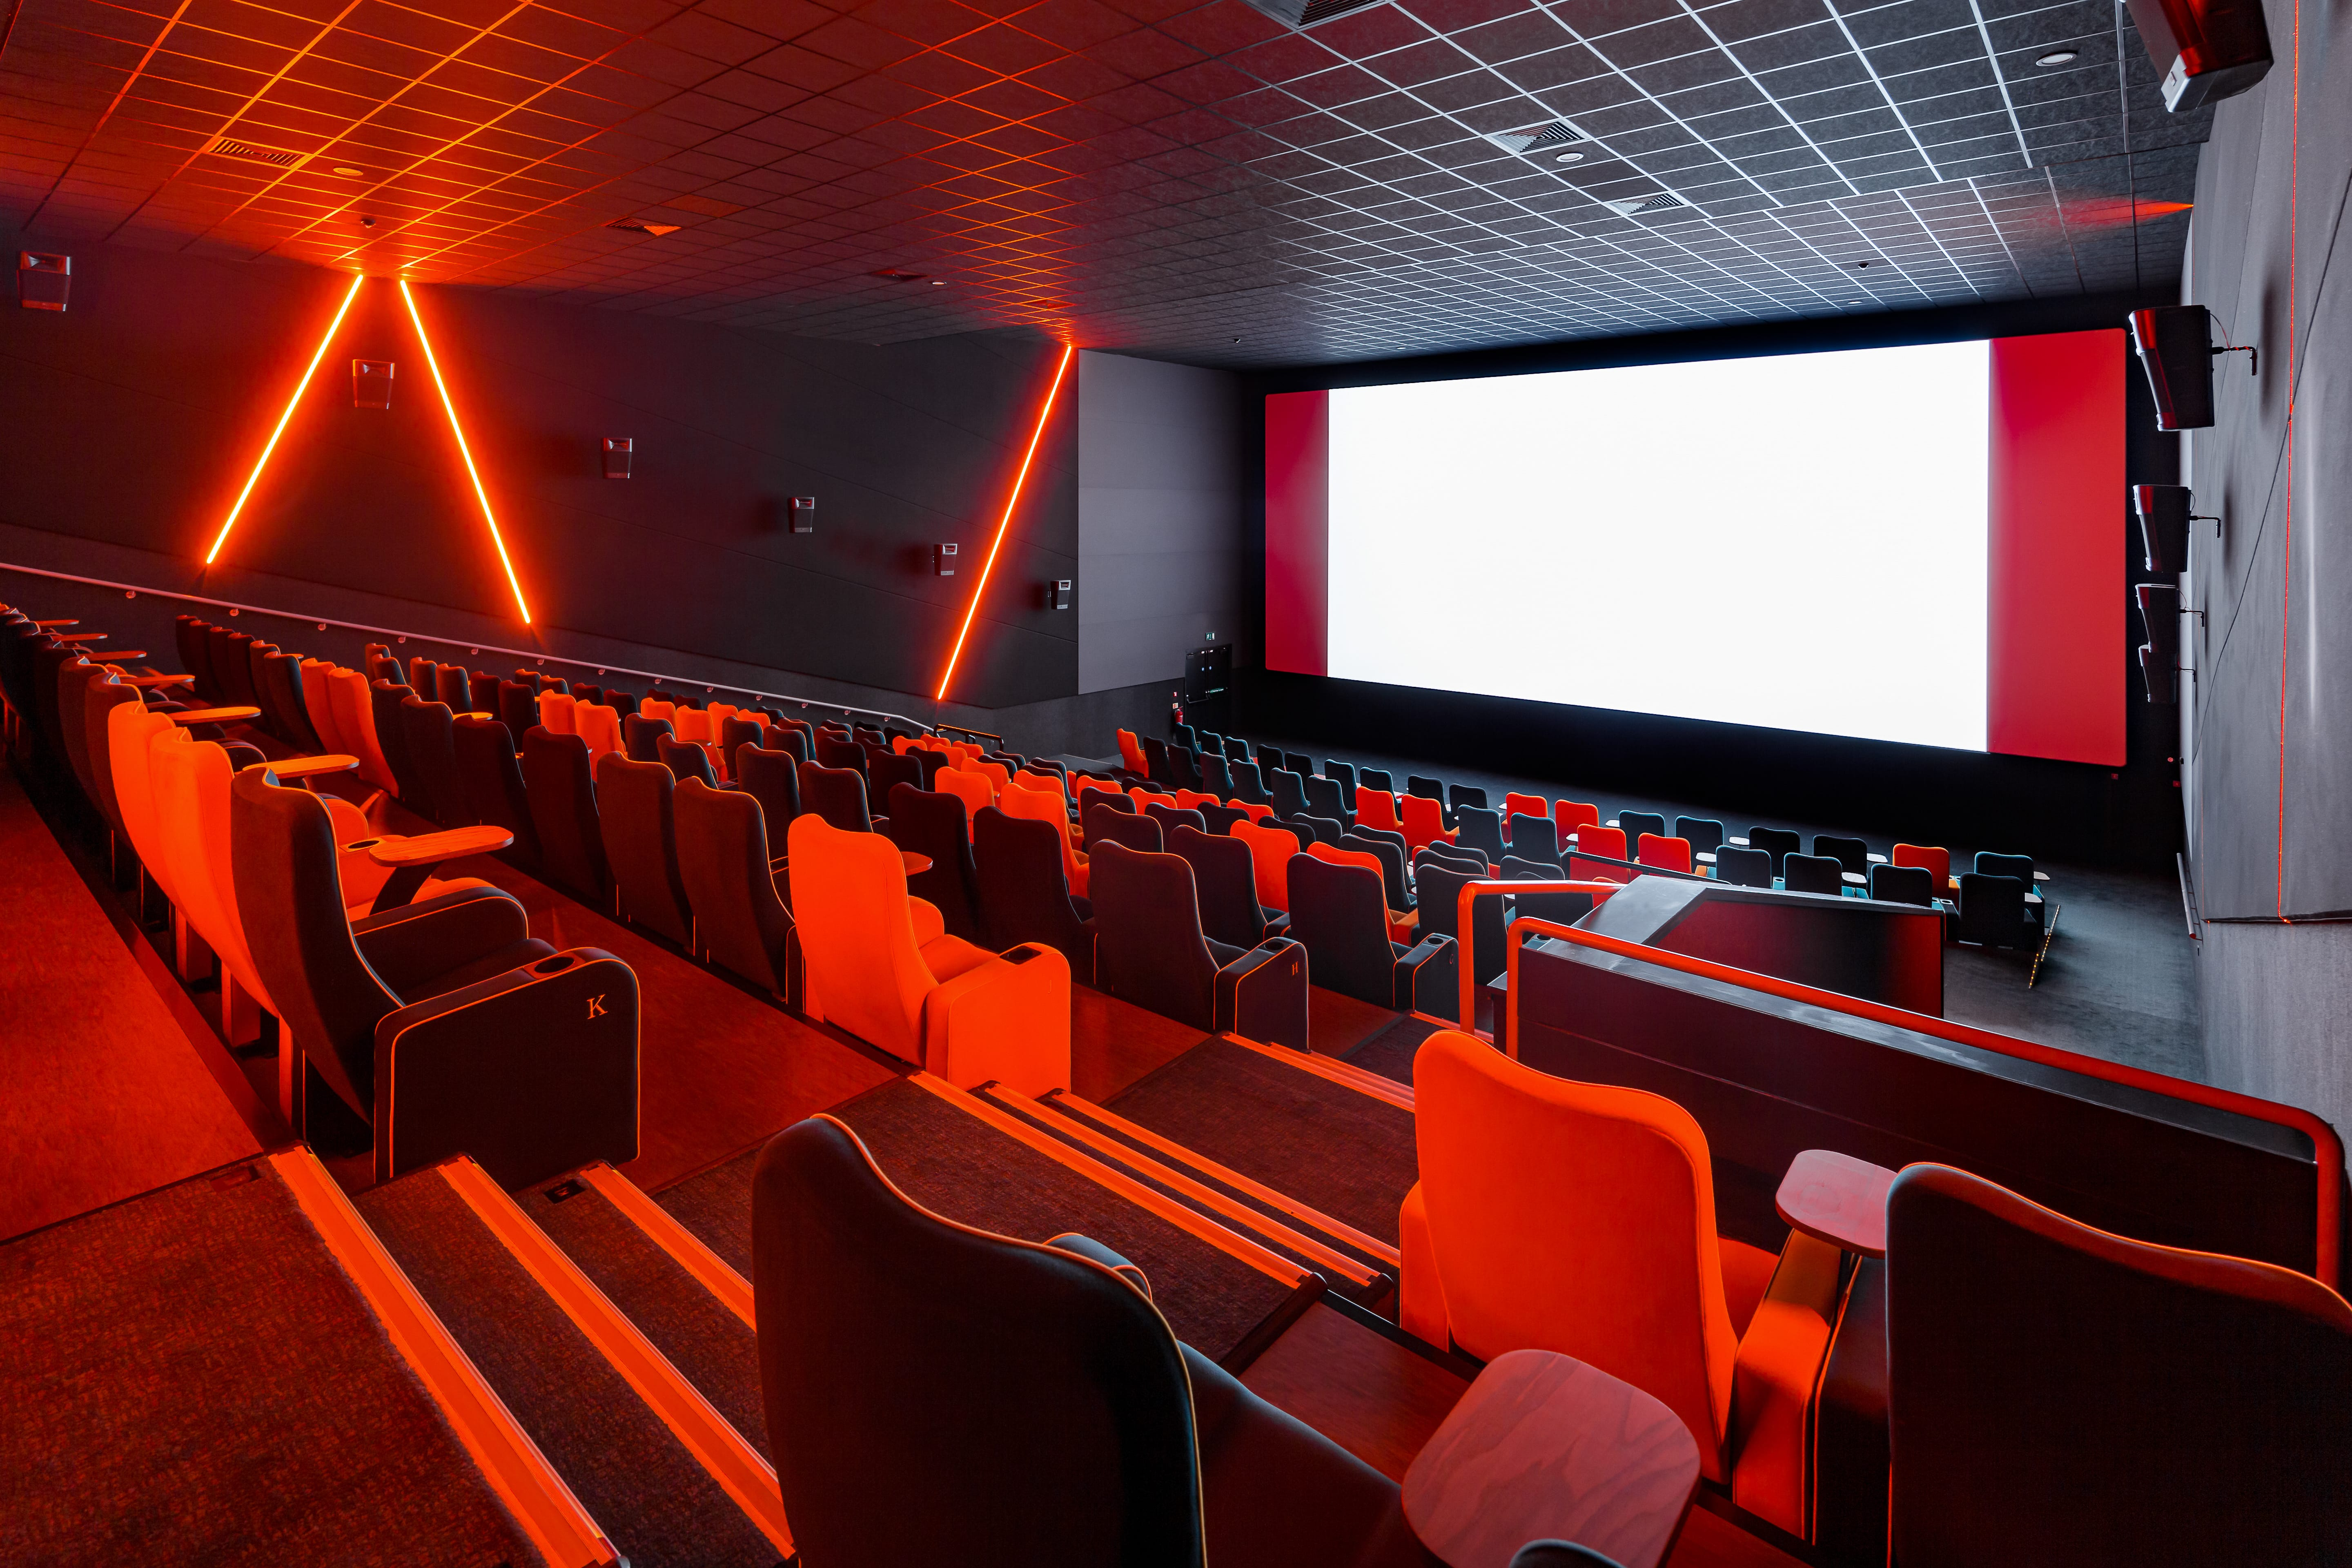

# Problem statement

Ama decided to set up a cinema for the first time in Tarkwa. She decided to confront Kwame to help her determine what types of movies could help bring revenue and to draw insight from some released movies over the past years.

# The Goals
At the end of my analysis, we should :
1. Which movie has the highest or lowest profit?
2. Movie with the highest and lowest budget?
3. Movie with the shortest and longest runtime?

In [1]:
#import all necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
#Reading the dataset
data = pd.read_csv("Movies Data.csv")

In [ ]:
#Reading the first five row of the dataset
data.head()

In [ ]:
#Reading the information about the dataset
data.info()

In [ ]:
#read columns
data.columns

In [ ]:
#display the available rows and columns
data.shape

# Workflow
Before you data analyzing starts, we need to ensure that data is well cleaned.

importing libraries>>>>>> Reading data >>>>> data cleaning (EDA==Exploratory data analysis ) and also some feature engineering and then conclusion

# Data Cleaning

In [ ]:
data.info()

In [ ]:
#Using missingno to visualise the missing value in the dataset
import missingno as msno
msno.bar(data)

From the diagram above more than 50% of the data under the homepage column is missing, hence we will drop that column.
Columns such as "Id, keywords, original_language, production_companies, overview, spoken languages, original_title, and tagline" will also be dropped.

In [ ]:
#checking the list of genres
data['genres']

In [ ]:
data["production_companies"]

In [6]:
#dropping columns
data = data.drop(columns=['homepage','id','keywords','original_language','production_companies','overview','spoken_languages','original_title','tagline'],axis=1)

In [ ]:
#checking the shape of the data
data.shape

# Checking Datatype and null values count

In [ ]:
data.info()

In [ ]:
#checking for the null values
data.isnull().sum()

In [8]:
#dropping the null field
data = data.dropna(subset=['release_date','runtime'])

In [ ]:
data.shape

In [ ]:
#checking the movies information after dropping null values
data.isnull().sum()

In [ ]:
msno.bar(data)

In [ ]:
#checking for the list of production_countries
data['production_countries']

In [ ]:
data.info()

In [ ]:
data['release_date']

In [ ]:
data["status"]

## checking the statistical summary of the dataset

In [ ]:
data.info()

In [ ]:
#checking then statistical of the movie dataset
data.describe()

In [ ]:
#So we need to change the release_date to its appropriate datatype
data['release_date'] = pd.to_datetime(data['release_date'])
data['release_date'].head()

In [ ]:
data.info()

In [ ]:
data.describe()

In [ ]:
#finding the movie with lowest budget
data[data['budget'] == 0]

In [ ]:
data[data['budget'] == data['budget'].min()]

In [ ]:
#counting zero values in budget data using group by
data.groupby('budget').count()


In [ ]:
#counting zero values in revenue data using group by
data.groupby('revenue').count()

In [ ]:
#counting zero values in runtime data using group by
movie_runtime = data.groupby('runtime').count()
movie_runtime.head(2)

In [ ]:
#counting zero values in runtime data using group by
data.groupby('runtime').count()

Runtime has less number of zeros, so it's better to drop them

In [13]:
#dropping the zero values in runtime column
data = data[data['runtime'] != 0]


In [14]:
#Replacing zero values with NaN values in the budget column
data['budget'] = data['budget'].replace(0,np.nan)

In [ ]:
data.groupby('budget').count()


In [15]:
#Replacing zero values with NaN values in the revenue column
data['revenue'] = data['revenue'].replace(0,np.nan)

In [ ]:
data.shape

In [ ]:
#counting zero values in runtime data using group by
movie_runtime = data.groupby('runtime').count()
movie_runtime.head(2)

In [ ]:
data.describe()

# EXPLORATORY DATA ANALYSIS

Tip: Now that the data is cleaned, it is ready for the exploration.
This can be done by creating visualisations with the goal of addressing the research questions that was posed in the introduction section

## Question 1
Which movie has the highest or lowest profit?

In [16]:
#calculate profit for each movie and create a new column in the dataframe name "Profit"
data['profit'] = data['revenue'] - data['budget']

In [ ]:
data.head()

In [ ]:
data[data["profit"] == data["profit"].max()]

In [ ]:
data[data["profit"] == data["profit"].min()]

In [ ]:
#Finding the movie with the highest and lowest using idmax and idmin user defined  function
def find_idmax(x):
  #use  the function "idmin" to find the of the lowest profit
  min_index =data[x].idxmin()

  #use the function "idmax" to find the highest profit
  max_index = data[x].idxmax()

  #use  the function "idmax" to find the highest profit in the DataFrame
  max_value = pd.DataFrame(data.loc[max_index, :])

  #use  the function "idmax" to find the highest profit in the DataFrame
  min_value = pd.DataFrame(data.loc[min_index, :])

  #print the movie with high and low profit
  print("Movie With the Highest" + x + " :" , data["title"][max_index] )
  print("Movie With the lowest" + x + " :" , data["title"][min_index] )

  # return max_value, min_value
  return pd.concat([max_value,min_value],axis=1)


find_idmax("profit")

  #return max_value, min_value



In [44]:
datamore = data[data["budget"] > 100000000]
dataless = data[data["budget"] < 100000000]

In [ ]:
values = [len(datamore), len(dataless)]
labels = ["DataMore", "DataLess"]
plt.pie(values, labels = labels, autopct='%1.1f%%')
plt.show()